In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Questions for Dataset 1:
## 1. Basic DataFrame Operations

In [2]:
# Load the dataset into a Pandas DataFrame.
df_1 = pd.read_csv('./students_grades.csv', header=0)

In [3]:
# Display the first 5 rows of the DataFrame.
df_1.head(5)

,StudentID,Name,Age,Gender,Math,Science,English,History,Physical_Education
0,1,John,16,M,85,92,78,84,90
1,2,Alice,15,F,79,95,88,92,87
2,3,Bob,16,M,90,85,86,88,95
3,4,Carol,15,F,77,89,90,81,85
4,5,David,16,M,92,80,79,85,92


In [4]:
# Display the summary statistics of the DataFrame.
df_1.describe()

,StudentID,Age,Math,Science,English,History,Physical_Education
count,10.00000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,5.50000,15.500000,83.500000,88.400000,84.800000,85.600000,89.200000
std,3.02765,0.527046,5.642104,4.623611,4.077036,4.299871,3.119829
min,1.00000,15.000000,75.000000,80.000000,78.000000,78.000000,85.000000
25%,3.25000,15.000000,79.250000,85.500000,82.500000,83.250000,87.250000
50%,5.50000,15.500000,84.500000,89.500000,85.500000,85.500000,89.500000
75%,7.75000,16.000000,87.250000,91.750000,87.750000,88.750000,90.750000
max,10.00000,16.000000,92.000000,95.000000,90.000000,92.000000,95.000000


In [5]:
# Display the column names of the DataFrame.
df_1.columns

Index(['StudentID', 'Name', 'Age', 'Gender', 'Math', 'Science', 'English',
       'History', 'Physical_Education'],
      dtype='object')

In [6]:
# Count the number of male and female students.
df_1['Gender'].value_counts()

Gender
M    5
F    5
Name: count, dtype: int64

## 2. Filtering and Subsetting

In [7]:
# Filter the DataFrame to show only students who are 16 years old.
df_1[df_1['Age'] == 16]

,StudentID,Name,Age,Gender,Math,Science,English,History,Physical_Education
0,1,John,16,M,85,92,78,84,90
2,3,Bob,16,M,90,85,86,88,95
4,5,David,16,M,92,80,79,85,92
6,7,Frank,16,M,75,90,82,78,88
8,9,Henry,16,M,88,83,87,86,85


In [8]:
# Filter the DataFrame to show only female students.
df_1[df_1['Gender'] == 'F']

,StudentID,Name,Age,Gender,Math,Science,English,History,Physical_Education
1,2,Alice,15,F,79,95,88,92,87
3,4,Carol,15,F,77,89,90,81,85
5,6,Eve,15,F,85,87,84,89,90
7,8,Grace,15,F,80,92,85,90,91
9,10,Ivy,15,F,84,91,89,83,89


In [9]:
# Filter the DataFrame to show students with Math scores above 85.
df_1[df_1['Math'] > 85]

,StudentID,Name,Age,Gender,Math,Science,English,History,Physical_Education
2,3,Bob,16,M,90,85,86,88,95
4,5,David,16,M,92,80,79,85,92
8,9,Henry,16,M,88,83,87,86,85


In [10]:
# Select the `Name` and `Total_Grades` columns for all students.
df_1['Total_Grades'] = df_1[['Math', 'Science', 'English', 'History', 'Physical_Education']].sum(axis=1)
df_1[['Name', 'Total_Grades']]

,Name,Total_Grades
0,John,429
1,Alice,441
2,Bob,444
3,Carol,422
4,David,428
5,Eve,435
6,Frank,413
7,Grace,438
8,Henry,429
9,Ivy,436


In [11]:
# Calculate the average Math score for male and female students.
df_1.groupby('Gender')['Math'].mean()

Gender
F    81.0
M    86.0
Name: Math, dtype: float64

## 3. Aggregation and Grouping

In [12]:
# Calculate the average grade for each subject.
df_1[['Math', 'Science', 'English', 'History', 'Physical_Education']].mean()

Math                  83.5
Science               88.4
English               84.8
History               85.6
Physical_Education    89.2
dtype: float64

In [13]:
# Calculate the average grade for each gender.
df_1.groupby('Gender')[['Math', 'Science', 'English', 'History', 'Physical_Education']].mean()

,Math,Science,English,History,Physical_Education
Gender,,,,,
F,81.0,90.8,87.2,87.0,88.4
M,86.0,86.0,82.4,84.2,90.0


In [14]:
# Calculate the total grades for each student (sum of all subjects).
df_1[['Math', 'Science', 'English', 'History', 'Physical_Education']].sum(axis=1)

0    429
1    441
2    444
3    422
4    428
5    435
6    413
7    438
8    429
9    436
dtype: int64

In [15]:
# Find the student with the highest total grade.
df_1.loc[df_1['Total_Grades'].idxmax()]

StudentID               3
Name                  Bob
Age                    16
Gender                  M
Math                   90
Science                85
English                86
History                88
Physical_Education     95
Total_Grades          444
Name: 2, dtype: object

In [16]:
# Calculate the average age of the students.
df_1['Age'].mean()

15.5

## 4. Data Vizualization

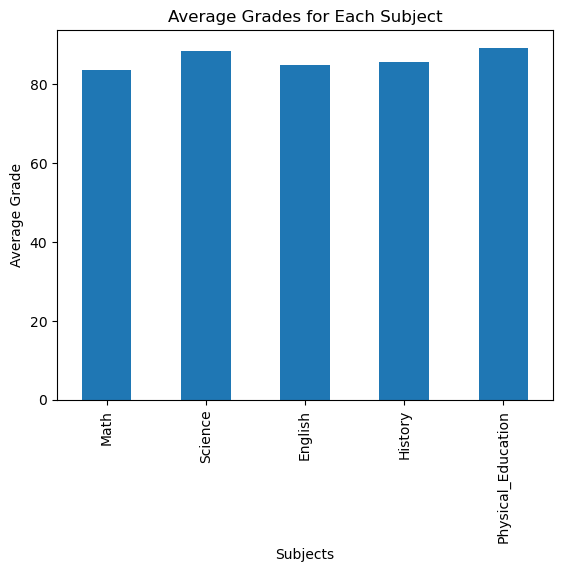

In [17]:
# Create a bar plot showing the average grade for each subject.
average_grades = df_1[['Math', 'Science', 'English', 'History', 'Physical_Education']].mean()
average_grades.plot(kind='bar', title='Average Grades for Each Subject')
plt.ylabel('Average Grade')
plt.xlabel('Subjects')
plt.show()

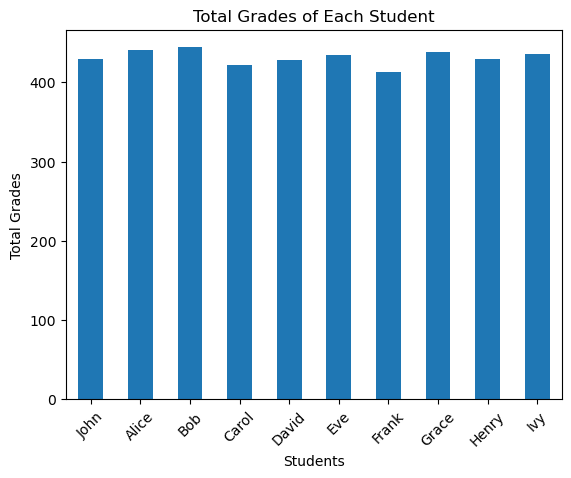

In [18]:
# Create a bar plot showing the total grades of each student.
df_1['Total_Grades'].plot(kind='bar', title='Total Grades of Each Student')
plt.ylabel('Total Grades')
plt.xlabel('Students')
plt.xticks(ticks=range(len(df_1)), labels=df_1['Name'], rotation=45)
plt.show()

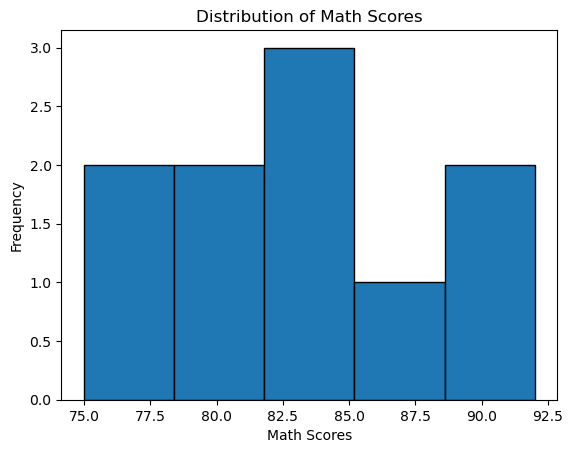

In [19]:
# Create a histogram showing the distribution of Math scores.
df_1['Math'].plot(kind='hist', bins=5, title='Distribution of Math Scores', edgecolor='black')
plt.xlabel('Math Scores')
plt.ylabel('Frequency')
plt.show()

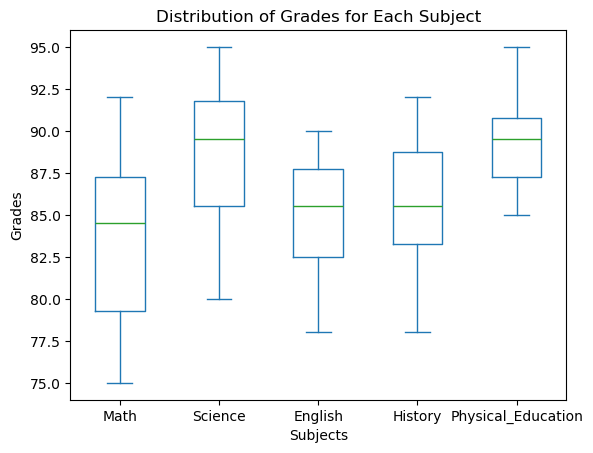

In [20]:
# Create a box plot to show the distribution of grades for each subject.
df_1[['Math', 'Science', 'English', 'History', 'Physical_Education']].plot(kind='box', title='Distribution of Grades for Each Subject')
plt.ylabel('Grades')
plt.xlabel('Subjects')
plt.show()

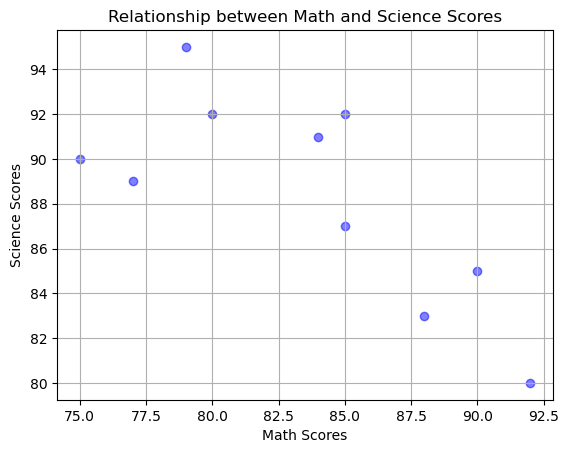

In [21]:
# Create a scatter plot showing the relationship between Math and Science scores.
plt.scatter(df_1['Math'], df_1['Science'], color='blue', alpha=0.5)
plt.title('Relationship between Math and Science Scores')
plt.xlabel('Math Scores')
plt.ylabel('Science Scores')
plt.grid(True)
plt.show()

# Questions for Dataset 2:
## 1. Basic DataFrame Operations:

In [22]:
# Load the dataset into a Pandas DataFrame.
df_2 = pd.read_csv('./employee_data.csv', header=0)

In [23]:
# Display the first 5 rows of the DataFrame.
df_2.head(5)

,EmployeeID,Name,Age,Department,Salary,YearsAtCompany
0,101,John Smith,28,Sales,60000,3
1,102,Jane Doe,34,Marketing,80000,7
2,103,Sam Johnson,45,HR,75000,10
3,104,Susan Lee,39,Finance,90000,5
4,105,Peter Brown,50,IT,95000,15


In [24]:
# Display the summary statistics of the DataFrame.
df_2.describe()

,EmployeeID,Age,Salary,YearsAtCompany
count,10.00000,10.000000,10.00000,10.000000
mean,105.50000,36.300000,76700.00000,7.100000
std,3.02765,7.660142,11343.62278,4.012481
min,101.00000,27.000000,60000.00000,2.000000
25%,103.25000,29.750000,70500.00000,4.250000
50%,105.50000,36.000000,76500.00000,6.500000
75%,107.75000,40.500000,83750.00000,9.500000
max,110.00000,50.000000,95000.00000,15.000000


In [25]:
# Display the column names of the DataFrame.
df_2.columns

Index(['EmployeeID', 'Name', 'Age', 'Department', 'Salary', 'YearsAtCompany'], dtype='object')

In [26]:
# Count the number of employees in each department.
df_2['Department'].value_counts()

Department
Sales        2
Marketing    2
HR           2
Finance      2
IT           2
Name: count, dtype: int64

## 2. Filtering and Subsetting

In [27]:
# Filter the DataFrame to show only employees who are older than 40.
df_2[df_2['Age'] > 40]

,EmployeeID,Name,Age,Department,Salary,YearsAtCompany
2,103,Sam Johnson,45,HR,75000,10
4,105,Peter Brown,50,IT,95000,15
7,108,Karen Black,41,HR,78000,11


In [28]:
# Filter the DataFrame to show only employees in the 'IT' department.
df_2[df_2['Department'] == 'IT']

,EmployeeID,Name,Age,Department,Salary,YearsAtCompany
4,105,Peter Brown,50,IT,95000,15
9,110,Alice Purple,27,IT,70000,2


In [29]:
# Filter the DataFrame to show employees with a salary above 75000.
df_2[df_2['Salary'] >= 75000]

,EmployeeID,Name,Age,Department,Salary,YearsAtCompany
1,102,Jane Doe,34,Marketing,80000,7
2,103,Sam Johnson,45,HR,75000,10
3,104,Susan Lee,39,Finance,90000,5
4,105,Peter Brown,50,IT,95000,15
7,108,Karen Black,41,HR,78000,11
8,109,James Blue,38,Finance,85000,8


In [30]:
# Select the Name and Salary columns for all employees.
df_2[['Name', 'Salary']]

,Name,Salary
0,John Smith,60000
1,Jane Doe,80000
2,Sam Johnson,75000
3,Susan Lee,90000
4,Peter Brown,95000
5,Linda Green,62000
6,David White,72000
7,Karen Black,78000
8,James Blue,85000
9,Alice Purple,70000


In [31]:
# Calculate the average salary for each department.
df_2.groupby('Department')['Salary'].mean()

Department
Finance      87500.0
HR           76500.0
IT           82500.0
Marketing    76000.0
Sales        61000.0
Name: Salary, dtype: float64

## 3. Aggregation and Grouping

In [32]:
# Calculate the average salary of all employees.
df_2['Salary'].mean()

76700.0

In [33]:
# Calculate the average age of employees in each department.
df_2.groupby('Department')['Age'].mean()

Department
Finance      38.5
HR           43.0
IT           38.5
Marketing    33.0
Sales        28.5
Name: Age, dtype: float64

In [34]:
# Calculate the total years worked at the company for all employees.
df_2['YearsAtCompany'].sum()

71

In [35]:
# Find the employee with the highest salary.
df_2.loc[df_2['Salary'].idxmax()]

EmployeeID                105
Name              Peter Brown
Age                        50
Department                 IT
Salary                  95000
YearsAtCompany             15
Name: 4, dtype: object

In [36]:
# Calculate the average years at the company for each department.
df_2.groupby('Department')['YearsAtCompany'].mean()

Department
Finance       6.5
HR           10.5
IT            8.5
Marketing     6.5
Sales         3.5
Name: YearsAtCompany, dtype: float64

## 4. Data Visualization

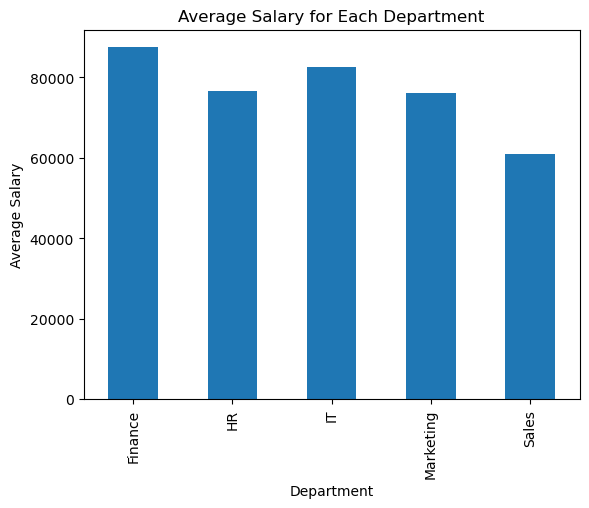

In [37]:
# Create a bar plot showing the average salary for each department.
average_salaries = df_2.groupby('Department')['Salary'].mean()
average_salaries.plot(kind='bar', title='Average Salary for Each Department')
plt.ylabel('Average Salary')
plt.xlabel('Department')
plt.show()

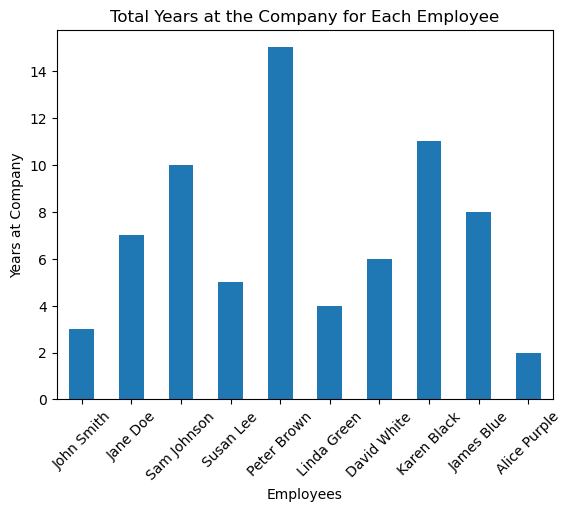

In [38]:
# Create a bar plot showing the total years at the company for each employee.
df_2['YearsAtCompany'].plot(kind='bar', title='Total Years at the Company for Each Employee')
plt.ylabel('Years at Company')
plt.xlabel('Employees')
plt.xticks(ticks=range(len(df_2)), labels=df_2['Name'], rotation=45)
plt.show()

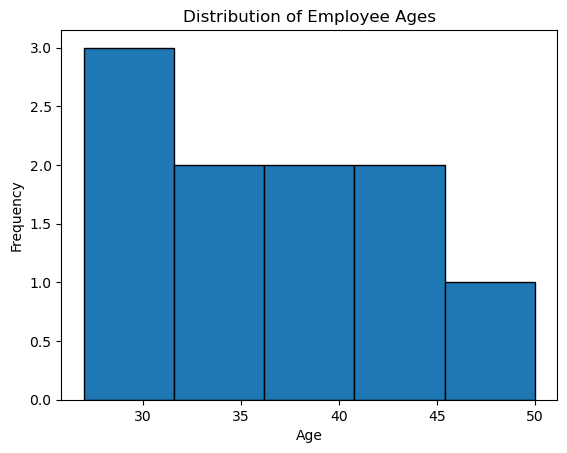

In [39]:
# Create a histogram showing the distribution of employee ages.
df_2['Age'].plot(kind='hist', bins=5, title='Distribution of Employee Ages', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

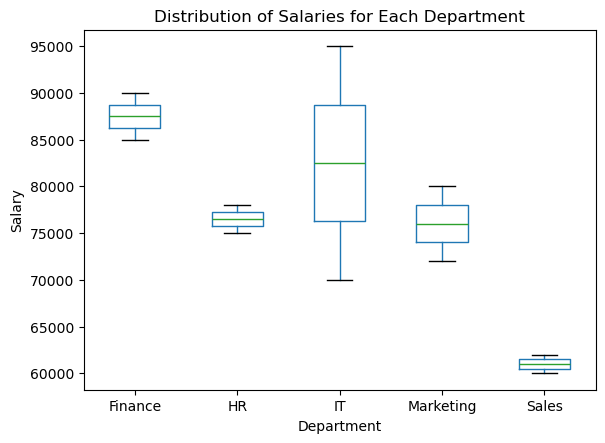

In [40]:
# Create a box plot to show the distribution of salaries for each department.
df_2.boxplot(column='Salary', by='Department', grid=False)
plt.title('Distribution of Salaries for Each Department')
plt.suptitle('')  # Suppress the default title to clean up the plot
plt.ylabel('Salary')
plt.xlabel('Department')
plt.show()

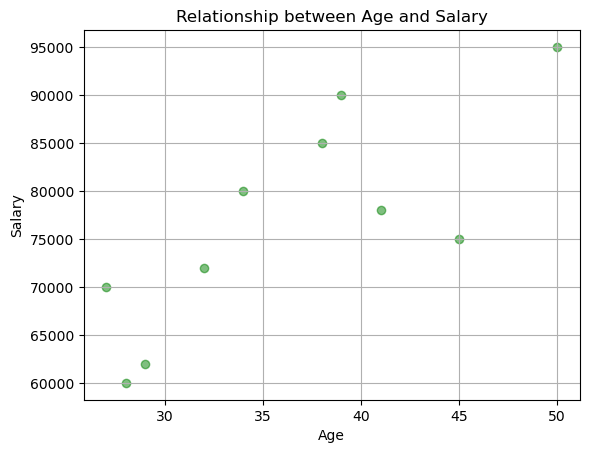

In [41]:
# Create a scatter plot showing the relationship between age and salary.
plt.scatter(df_2['Age'], df_2['Salary'], color='green', alpha=0.5)
plt.title('Relationship between Age and Salary')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.grid(True)
plt.show()